In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

import glob

# File to Load (Remember to change these)

dataFiles = glob.glob("Data\*")
print(dataFiles)
dfs = [pd.read_csv(eachFile) for eachFile in dataFiles]

dfMapsFiles = dict()

#'DM_PREV': df of DM_PREV
#'OB': df of OB
#'LTPIA': df of LTPIA
#'INCOME': df of INCOME

#drop irrelevant info
dropColsPatterns = {
'DM_PREV': (True, [3,5,6,7,8, 9], 7, "FIPS Codes"),
'OB': (True, [3, 4], 3, "FIPS Codes"),
'LTPIA': (True, [3, 4], 3, "FIPS Codes"),
'INCOME': (False, 1) 
}    

#Data Mungling with CSV files
#calculate drops
def getCalDropCols(series=None, opSet=0, years=9):
    data = pd.DataFrame(series)
    drop = []
    for x in range(years):
        data[x+1] = data[x]+opSet
    for x in data.columns: 
        drop.append(data[x].values.tolist())
    return list( itertools.chain.from_iterable(drop)) 

#cover object to numeric...only applies to Series
def objToFloat(df=None, columns=None):
    print(columns)
    for info in columns:
         df[info] = pd.to_numeric(df[info], errors='coerce')

# clean up data in DM_PREV, OB, LTPIA, INCOME csvs
# drop unnecessary columns and convert to proper dtype
for file, df in zip(dataFiles, dfs):
    for pattern in dropColsPatterns.keys():
        if pattern in file:
            # handles DM_PREV, OB, LTPIA
            if (dropColsPatterns[pattern][0] == True):
            #print(pattern, key)
                array =dropColsPatterns[pattern][1]
                opSet = dropColsPatterns[pattern][2]
                cols = getCalDropCols(array,opSet)
                print(cols)
                columnInfo = list(df.columns)
                df.columns = df.iloc[0]
                comments = df.columns[-1]
                years = [each for each in columnInfo if ("20" in each and not "Un" in each)]
                df = df.drop(df.columns[cols],axis=1)
                comments = df.columns[-1]
                df = df[1:] #create new df
                df['County'] = pd.Series(df['County'].replace(' County', '', regex=True))
                df['County'] = pd.Series(df['County'].replace(' Parish', '', regex=True))
                colslabel = ['State', 'FIPS', 'County'] + years
                df.columns = colslabel

                df['Comments'] = comments
                #df.replace("Comments", np.nan, regex=True)
                #print(df.head(3))
                objToFloat(df, years)
                #print(df.head(100).tail(10))
                df = df.dropna()
                df.to_csv(pattern+".csv", na_rep="NaN")
                dfMapsFiles[pattern] = [file, df]
                break
            elif (dropColsPatterns[pattern][0]==False): #handle INCOME
                df.columns = ['Rank', 'State', 'County', 'Per Capita Income', 
                              'Median Household Income', 'Median Family Income', 
                              'Population', '# of households']
                df['County'] = pd.Series(df['County'].replace(' County', '', regex=True))
                df = df.dropna()
                # dollars sign replacement
                df = df[df.columns].replace('[\$,]', '', regex=True)#.astype(int, error=ignore)
                objToFloat(df, df.columns[3:])
                dfMapsFiles[pattern] = [file, df]
                df.to_csv(pattern+".csv", na_rep="NaN")
                break
            #print(df.dtypes)
   
#Element 0 = file, 1 = df

['Data\\DM_PREV_ALL_STATES.csv', 'Data\\LTPIA_RANK_ALL_STATES.csv', 'Data\\OB_RANK_ALL_STATES.csv', 'Data\\WIKI_INCOME_SOURCE.csv']
[3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72]
['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
[3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 30, 31]
['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
[3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 30, 31]
['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
Index(['Per Capita Income', 'Median Household Income', 'Median Family Income',
       'Population', '# of households'],
      dtype='object')


In [442]:
DM_PREV_Info = dfMapsFiles['DM_PREV'][dfIndex] 

statesAvgDiabetes = pd.DataFrame(DM_PREV_Info.groupby("State")['2004'].mean())
for eachYear in years[1:]:
    statesAvgDiabetes[eachYear] = DM_PREV_Info.groupby("State")[eachYear].mean()
Diabetes['2013'].sort_values(ascending=False)
Diabetes = statesAvgDiabetes

OB_Info = dfMapsFiles['OB'][dfIndex]
LTPIA_Info = dfMapsFiles['LTPIA'][dfIndex]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Index(['State', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013'],
      dtype='object')


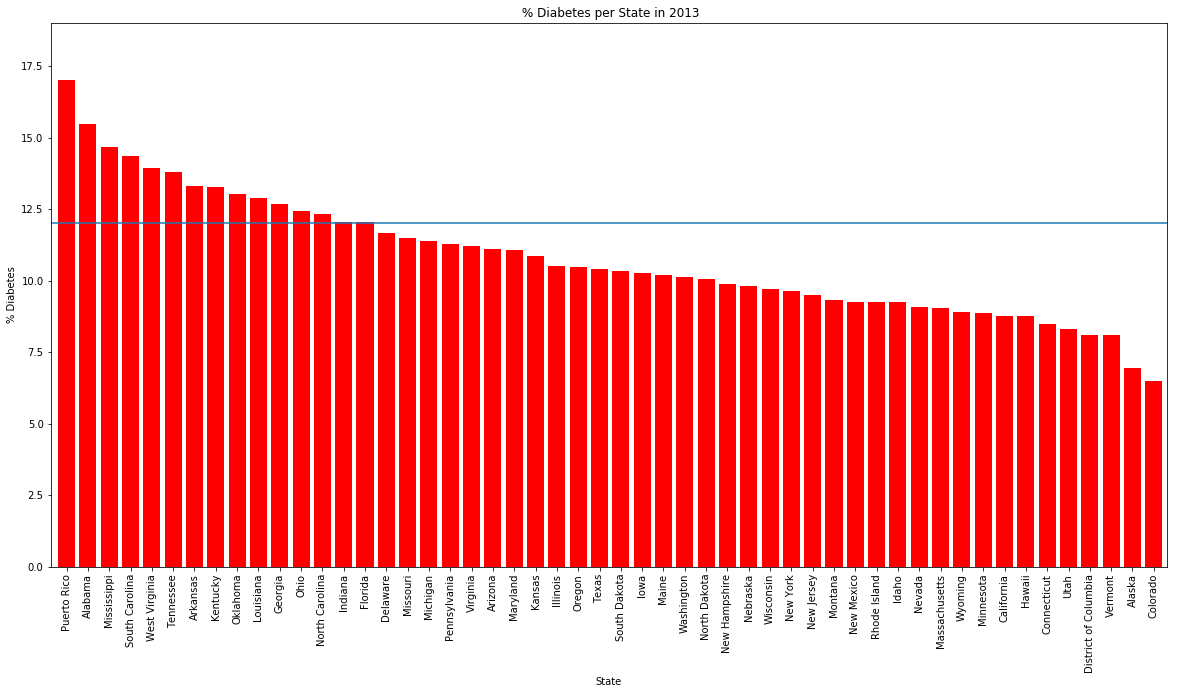

Index(['State', 'PerCapitaIncome', 'Margin of Error'], dtype='object')


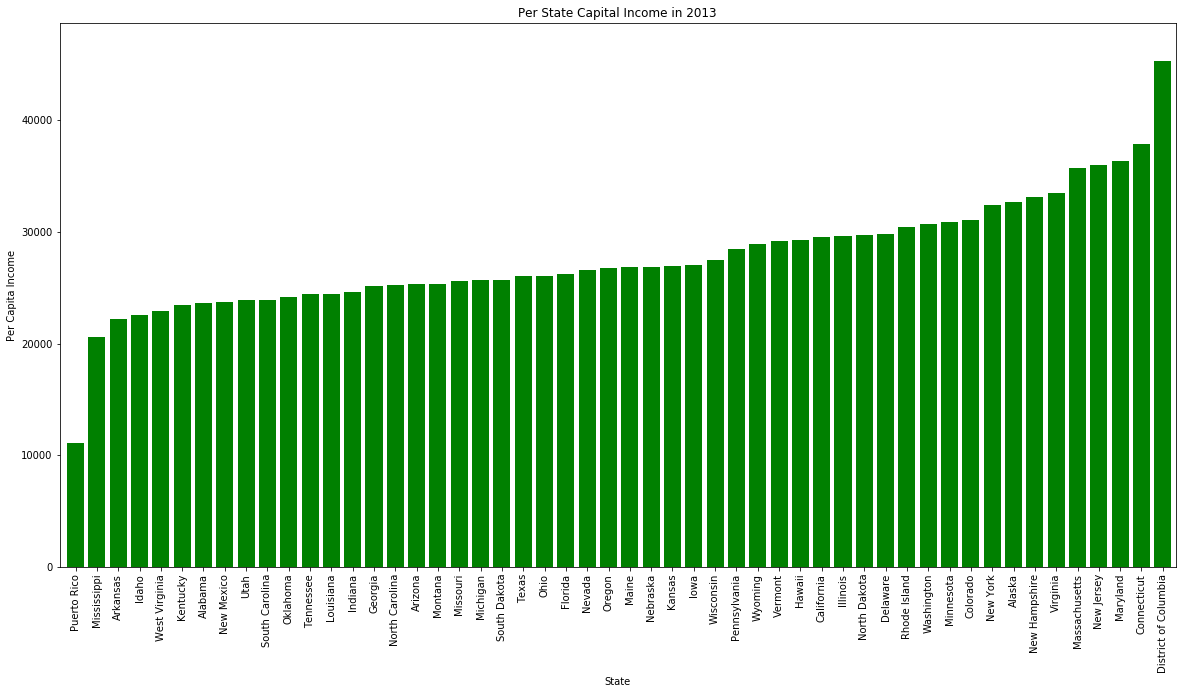

In [447]:
df = Diabetes
df = df.reset_index()
df = df.sort_values(['2013'], ascending=False)
#print(A)
import math
x_axis = np.arange(len(df))
#y_axis = np.arange(max(df["2013"]))
print(y_axis)
ytick_locations = [value for value in y_axis]
tick_locations = [value+0.4 for value in x_axis]
print(df.columns)
high = max(df["2013"])
low = min(df["2013"])           


plt.figure(figsize=(20,10 ))
#plt.grid(True)
plt.xlim(-0.35, len(x_axis))
plt.ylim([math.ceil(low-0.7*(high-low)), math.ceil(high+0.1*(high-low))])
plt.bar(x_axis, df["2013"], color='r', alpha=1, align="edge")
plt.xticks(tick_locations, df["State"], rotation="vertical")

plt.title(" % Diabetes per State in 2013")
plt.xlabel("State")
plt.ylabel("% Diabetes")
#cut off at 12%
plt.axhline(y=12)
plt.savefig("DiabeteRatePerStateOrTerrorities.png")
plt.show()



df = C.sort_values("PerCapitaIncome")
x_axis = np.arange(len(df))
#y_axis = np.arange(max(df["2013"]))


tick_locations = [value+0.4 for value in x_axis]
print(df.columns)
high = max(df["PerCapitaIncome"])
low = min(df["PerCapitaIncome"])           


plt.figure(figsize=(20,10 ))
#plt.grid(True)
plt.xlim(-0.35, len(x_axis))
plt.ylim(0, math.ceil(high+0.1*(high-low)))
#plt.barh(x_axis, df["PerCapitaIncome"], color='g', alpha=1, align="edge")
plt.bar(x_axis, df["PerCapitaIncome"], color='g', alpha=1, align="edge")
plt.xticks(tick_locations, df["State"], rotation="vertical")

plt.title("Per State Capital Income in 2013")
plt.xlabel("State")
plt.ylabel("Per Capita Income")
#cut off at 12%
plt.savefig("PerCapitaIncomebyStates.png")
plt.show()

In [394]:

diabetesInfo = dict()

dfIndex = 1

#'INCOME': df of INCOME joins DM_PREV 
diabetesInfo['INCOME'] = pd.merge(dfMapsFiles['DM_PREV'][dfIndex], dfMapsFiles['INCOME'][dfIndex], on=['County','State'])
#'OB': df of OB joins DM_PREV 
#diabetesInfo['OB'] = pd.merge(dfMapsFiles['OB'][dfIndex], dfMapsFiles['INCOME'][dfIndex], on=['County','State'])
diabetesInfo['OB'] = pd.merge(dfMapsFiles['OB'][dfIndex], dfMapsFiles['DM_PREV'][dfIndex], on=['County','State'])


#'LTPIA': df of LTPIA joins DM_PREV 
diabetesInfo['LTPIA'] = pd.merge(dfMapsFiles['LTPIA'][dfIndex], dfMapsFiles['DM_PREV'][dfIndex], on=['County','State'])
#diabetesInfo['LTPIA'] = pd.merge(dfMapsFiles['INCOME'][dfIndex], dfMapsFiles['LTPIA'][dfIndex], on=['County','State'])

#diabetesInfo['INCOME'].sort_values("2013", ascending=False)
#diabetesInfo['OB'] = pd.merge(dfMapsFiles['OB'][dfIndex], dfMapsFiles['INCOME'][dfIndex], on=['County','State'])

#diabetesInfo['OB']

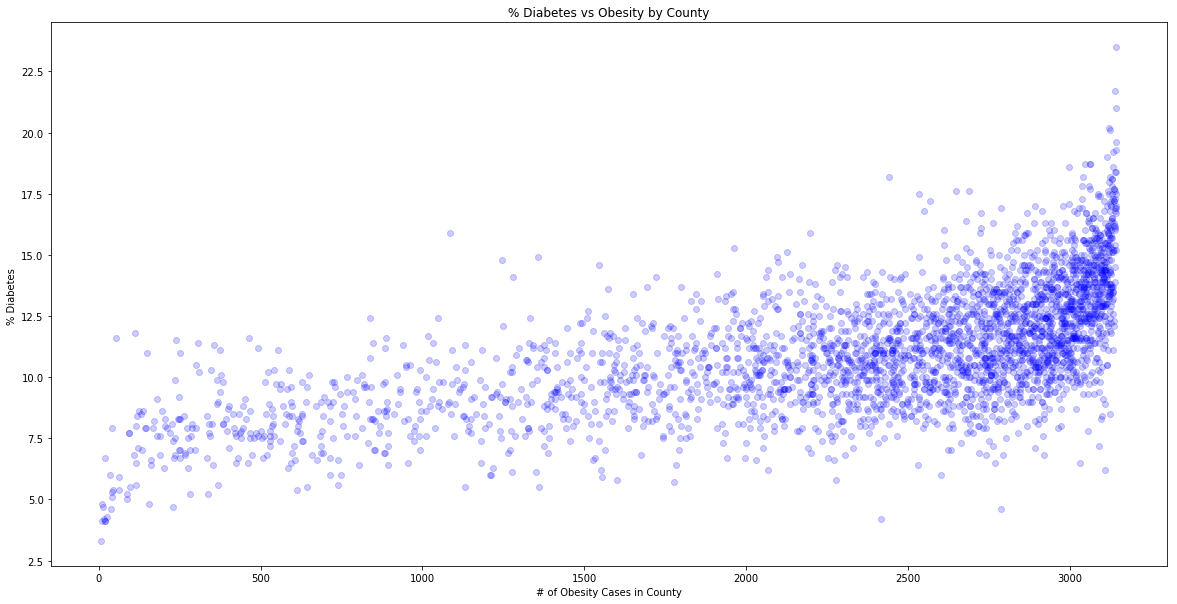

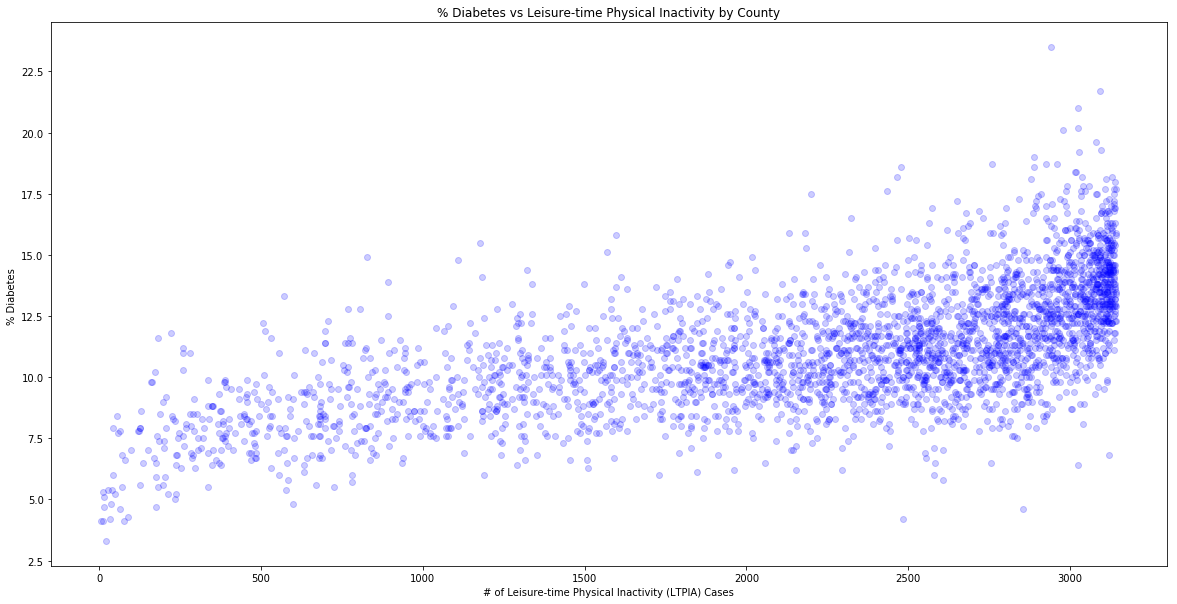

In [436]:
LatsX = diabetesInfo['OB']['2013_x']

TempsY = diabetesInfo['OB']['2013_y']
plt.figure(figsize=(20,10 ))

plt.scatter(LatsX, TempsY, color="blue", linewidths=1, marker="o",  alpha=0.2, label="Cities")


plt.title("% Diabetes vs Obesity by County")
plt.ylabel("% Diabetes ")
plt.xlabel("# of Obesity Cases in County")
plt.savefig("DiabetesVsObesitybyCounty.png")
plt.show()
#A.sort_values('Per Capita Income')

diabetesInfo['LTPIA']
LatsX = diabetesInfo['LTPIA']['2013_x']

TempsY = diabetesInfo['LTPIA']['2013_y']
plt.figure(figsize=(20,10 ))

plt.scatter(LatsX, TempsY, color="blue", linewidths=1, marker="o",  alpha=0.2, label="Cities")


plt.title("% Diabetes vs Leisure-time Physical Inactivity by County")
plt.ylabel("% Diabetes ")
plt.xlabel("# of Leisure-time Physical Inactivity (LTPIA) Cases")
plt.savefig("DiabetesVsLTPIA.png")
plt.show()




In [126]:
a = diabetesInfo['INCOME'].groupby("State")['2004'].mean()
diabetes = test = pd.DataFrame(a)
b = diabetesInfo['OB'].groupby("State")['2004'].mean()
c = diabetesInfo['LTPIA'].groupby("State")['2004'].mean()
d = diabetesInfo['INCOME'].groupby("State")['Per Capita Income'].mean()
diabetes = test = pd.DataFrame(a)
OB =  pd.DataFrame(b)
LTPIA = pd.DataFrame(c)


In [342]:
#test['ob'] = b
#test['ltpia'] = c 
#test['income'] = d
for eachYear in years[1:]:
    diabetes[eachYear] = diabetesInfo['INCOME'].groupby("State")[eachYear].mean()
    OB[eachYear] = diabetesInfo['OB'].groupby("State")[eachYear].mean()
    LTPIA[eachYear]  = diabetesInfo['LTPIA'].groupby("State")[eachYear].mean()
    
    

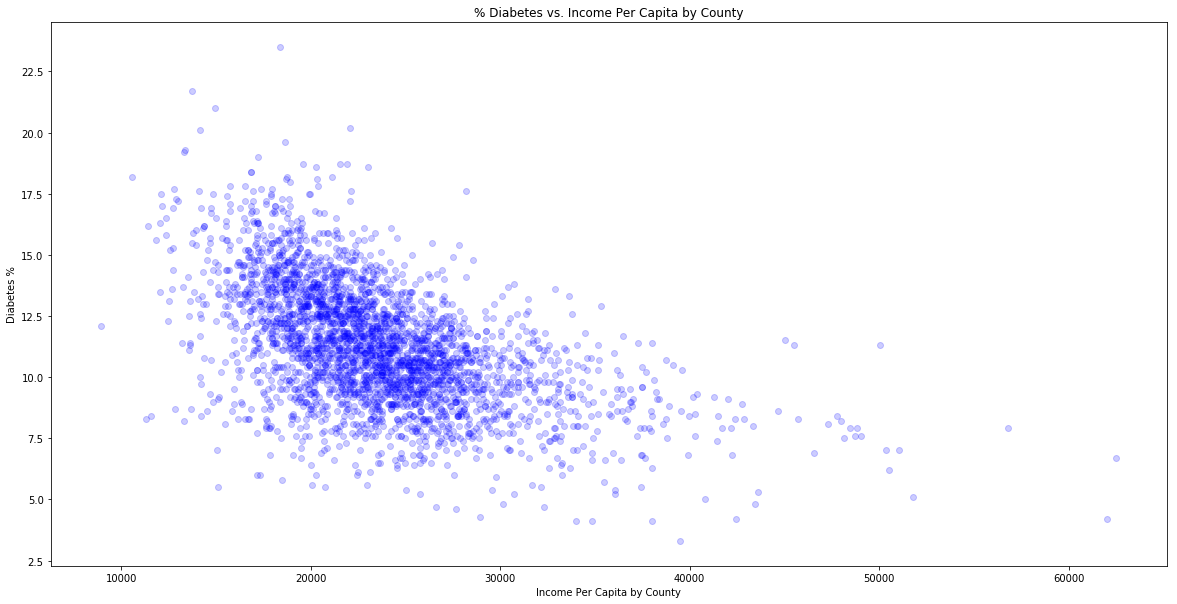

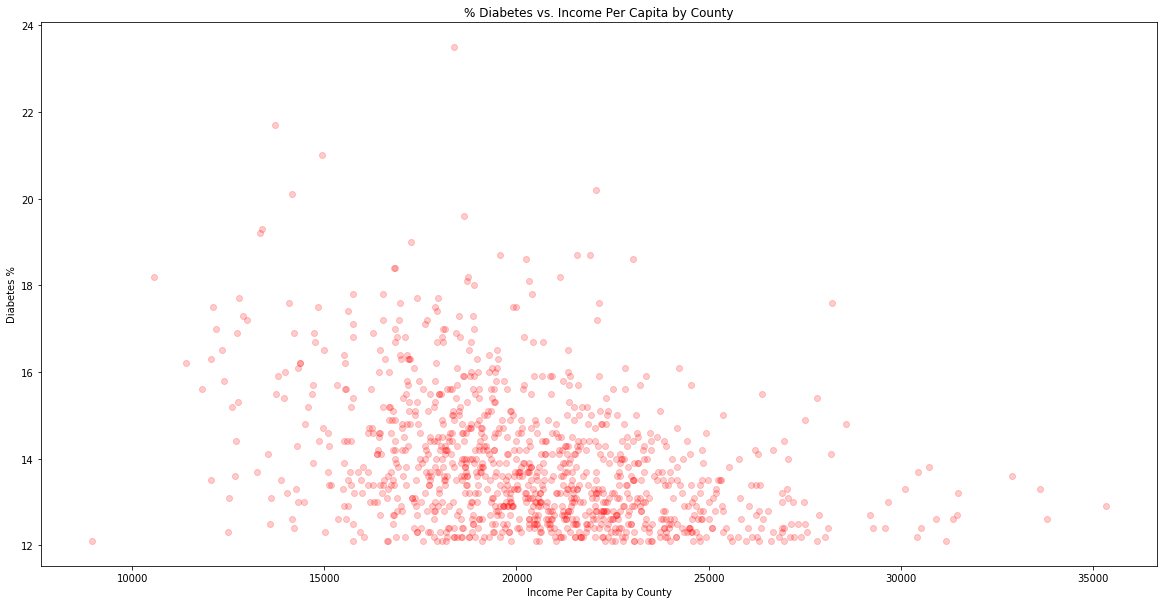

In [433]:
LatsX = diabetesInfo['INCOME']['Per Capita Income']
A = pd.DataFrame(B.groupby("State")['Per Capita Income'].mean())

TempsY = diabetesInfo['INCOME']['2013']
plt.figure(figsize=(20,10 ))

plt.scatter(LatsX, TempsY, color="blue", linewidths=1, marker="o",  alpha=0.2, label="Cities")

plt.title("% Diabetes vs. Income Per Capita by County")
plt.ylabel("Diabetes %")
plt.xlabel("Income Per Capita by County")
plt.savefig("DiabetesVsIncomePerCapitaByCounty.png")
plt.show()


diabetes
df = diabetesInfo['INCOME']
report = df.loc[df['2013']> 12, ['State', 'County', '2013', 'Per Capita Income', 'Population'] ] 
report.sort_values("2013", ascending=False)
A = report.groupby("State")['2013'].mean()
#OB
#LTPIA

LatsX = report['Per Capita Income']


TempsY = report['2013']
plt.figure(figsize=(20,10 ))

plt.scatter(LatsX, TempsY, color="r", linewidths=1, marker="o",  alpha=0.2, label="Cities")

plt.title("% Diabetes vs. Income Per Capita by County")
plt.ylabel("Diabetes %")
plt.xlabel("Income Per Capita by County")
plt.savefig("Diabetes%12ByCounty+VsIncomePerCapita.png")
plt.show()

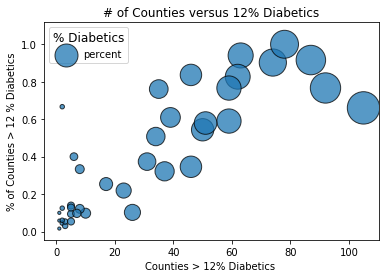

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State,,,,,,,,,,
Alabama,9.946269,10.505970,11.656716,12.474627,13.055224,13.897015,14.082090,14.477612,15.040299,15.489552
Alaska,5.137500,5.554167,5.812500,6.358333,6.458333,6.629167,7.262500,7.075000,7.041667,6.937500
Arizona,7.673333,8.000000,8.560000,9.106667,9.413333,9.960000,10.080000,10.460000,10.600000,11.093333
Arkansas,8.677333,9.092000,9.680000,10.478667,11.310667,11.913333,12.454667,12.750667,12.773333,13.308000
California,6.482759,6.891379,7.143103,7.475862,7.606897,7.929310,8.077586,8.417241,8.555172,8.774138
Colorado,4.798438,4.829687,5.260938,5.648438,5.621875,5.996875,6.306250,6.679687,6.506250,6.482812
Connecticut,6.312500,6.662500,7.187500,7.225000,7.675000,7.750000,8.287500,8.525000,8.562500,8.475000
Delaware,8.800000,9.033333,9.733333,9.933333,10.166667,10.333333,10.600000,10.566667,11.200000,11.666667
District of Columbia,7.900000,8.200000,8.300000,8.500000,8.300000,8.200000,8.100000,8.200000,8.100000,8.100000


In [445]:

#info2013 = pd.DataFrame(Diabetes['2013'])

info2013 =  pd.DataFrame(LTPIA_Info.groupby("State")['2013'].mean())
    #LTPIA_Info.groupby("State")['2013'].mean()).sort_values("2013", ascending = False)
info2013 = pd.merge(info2013, pd.DataFrame(OB_Info.groupby("State")['2013'].mean()), on=['State'])

info2013 = info2013.reset_index()
#info2013.columns = ['State', '%Diabetes', 'LTPIA', 'OB']
info2013

#IncomePerCapita Per State
fileToLoad = "IncomePerCapita.csv"
incomePerCapitaByState = pd.read_csv(fileToLoad)

info2013 = pd.merge(info2013, incomePerCapitaByState, on=['State'])
#info2013.sort_values("%Diabetes", ascending=False)


summaryF = (f.groupby("State").count())
G = pd.merge(summaryF, summaryD, on='State')
G["percent"] = G['County_x']/G['County_y'] 
G.sort_values("percent", ascending=False)

plt.title("# of Counties versus 12% Diabetics")
plt.ylabel("% of Counties > 12 % Diabetics")
plt.xlabel("Counties > 12% Diabetics ")

x_axis, dataY = G['County_x'], G["percent"]
plt.scatter(x_axis, dataY,  marker="o", edgecolors="black", linewidths=1, s=x_axis*10, alpha=0.75 )#,label = eachType)
#plt.scatter(x_axis, dataY,  marker="o", facecolors=color, edgecolors="black", linewidths=1, s=x_axis*10, alpha=0.75 )#,label = eachType)

plt.legend(title='% Diabetics', title_fontsize=12, loc='best')
plt.savefig("BubblePlot.png")
plt.show()    


#plt.savefig("DiabetesVsIncomePerCap

df

In [386]:
A.sort_values("Per Capita Income", ascending=True)

,Per Capita Income
State,
Mississippi,18341.731707
Arkansas,19443.186667
Georgia,20093.773585
Kentucky,20183.806723
Alabama,20481.432836
Tennessee,20801.063158
Arizona,20863.933333
South Carolina,20910.521739
Missouri,20942.535088
